# Locally Weighted Linear Regression
Instead of fitting a single regression line, we find a nearest points to the given data point X using a kernel function (to compute weights) and fit the model for it, we do this for every single point, therfore this model results in smooth curve.

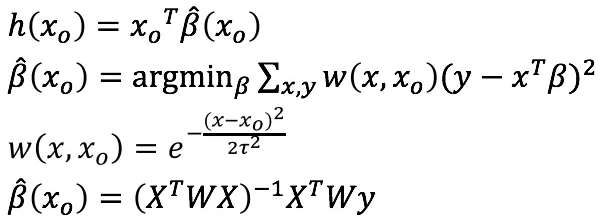

Given a dataset X, y, we attempt to find a model h(x) that minimizes residual sum of weighted squared errors. The weights are given by a kernel function.

Gaussian kernel:
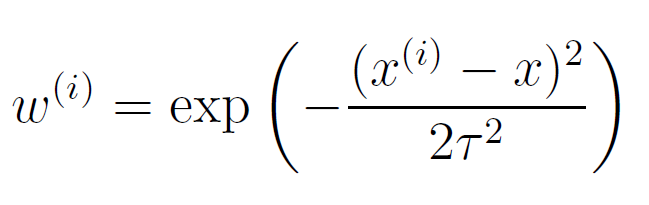

In [1]:
import numpy as np

In [8]:
def gaussian_kernel(xi,X,tau):
    return np.exp(-(xi-X)**2/(2*tau**2))

In [3]:
def LWR(xi, X, y, tau):
    weights = gaussian_kernel(xi, X, tau)    
    Phi = np.column_stack((np.ones(len(X)), X))
    W = np.diag(weights)
    theta = np.linalg.inv(Phi.T @ W @ Phi) @ Phi.T @ W @ y
    return np.array([1,xi]) @ theta

In [4]:
def predict(X_test,X,y,tau=0.1):
    preds = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        preds[i] = LWR(X_test[i],X,y,tau)
    return preds

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data[:, 5]  # use only the number of rooms as the predictor variable
y = boston.target

In [11]:
X_test = np.linspace(np.min(X), np.max(X), 1000)
y_preds = predict(X_test,X,y)

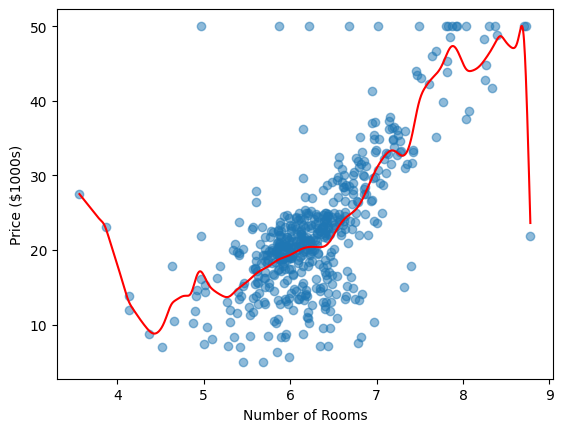

In [12]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X_test, y_preds, color='red')
plt.xlabel('Number of Rooms')
plt.ylabel('Price ($1000s)')
plt.show()
